In [1]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

print(nth_prime(400))

2741


In [1]:
def get_all_newforms_at_level(level, expansion_terms=30, output_file=None):
    """
    Get ALL weight 2 rational newforms at a specific level.
    Only takes one curve per isogeny class (since they give the same newform).
    """
    from sage.databases.cremona import CremonaDatabase
    import time
    
    start_time = time.time()
    db = CremonaDatabase()
    
    rational_forms = []
    
    print(f"Weight 2 rational newforms at level {level}")
    print(f"Computing {expansion_terms} terms\n")
    
    # Open output file if specified
    if output_file:
        f_out = open(output_file, 'w')
    
    try:
        curves = db.allcurves(level)
        
        if curves:
            # Group by isogeny class (the letter part)
            isogeny_classes = {}
            for label in curves.keys():
                # Extract the letter (isogeny class identifier)
                letter = ''.join([c for c in label if c.isalpha()])
                if letter not in isogeny_classes:
                    isogeny_classes[letter] = label
            
            print(f"Found {len(isogeny_classes)} distinct newforms (isogeny classes)\n")
            
            # Process one curve per isogeny class
            for letter in sorted(isogeny_classes.keys()):
                label = isogeny_classes[letter]
                full_label = f"{level}{label}"
                E = EllipticCurve(full_label)
                rational_forms.append((level, 2, E))
                
                # Print header to console
                print(f"\n{'='*70}")
                print(f"Newform {len(rational_forms)}: Isogeny class {level}{letter}")
                print(f"Representative curve: {full_label}")
                print(f"{'='*70}")
                
                # Get coefficients
                an_list = E.anlist(expansion_terms + 1)
                coeffs = an_list[1:]
                
                # Write to file
                if output_file:
                    f_out.write(f"Isogeny class: {level}{letter}\n")
                    f_out.write(f"Representative curve: {full_label}\n")
                    f_out.write(f"Coefficients a_1 to a_{expansion_terms}:\n")
                    f_out.write(str(coeffs) + "\n\n")
                
                # Show first 10 coefficients to console
                print(f"Coefficients (first 10 of {expansion_terms}):")
                print(f"  a_1-a_10: {coeffs[:10]}")
                
                # Additional info
                print(f"\nCurve info:")
                print(f"  Conductor: {E.conductor()}")
                print(f"  Rank: {E.rank()}")
                
                if output_file:
                    f_out.write(f"Conductor: {E.conductor()}\n")
                    f_out.write(f"Rank: {E.rank()}\n")
                    f_out.write(f"{'='*70}\n\n")
    
    except Exception as e:
        print(f"Error at level {level}: {e}")
    
    if output_file:
        f_out.close()
        print(f"\nFull data written to: {output_file}")
    
    elapsed = time.time() - start_time
    print(f"\n{'='*70}")
    print(f"Found {len(rational_forms)} distinct newforms in {elapsed:.2f} seconds")
    print(f"{'='*70}")
    
    return rational_forms


results = get_all_newforms_at_level(
    level=24,
    expansion_terms=2800,
    output_file="/Users/barrybrent/data2/run23feb26no1.txt"
)

Weight 2 rational newforms at level 24
Computing 2800 terms

Found 1 distinct newforms (isogeny classes)


Newform 1: Isogeny class 24a
Representative curve: 24a1
Coefficients (first 10 of 2800):
  a_1-a_10: [1, 0, -1, 0, -2, 0, 0, 0, 1, 0]

Curve info:
  Conductor: 24
  Rank: 0

Full data written to: /Users/barrybrent/data2/run23feb26no1.txt

Found 1 distinct newforms in 1.03 seconds


In [4]:
# loads all forms at a given level one at a time converted to lists
def load_newforms_from_file(filename):
    """
    Load all newforms from a file and return them as a list of dictionaries.
    Each dictionary contains the label and coefficients.
    """
    with open(filename, 'r') as f:
        content = f.read()
    
    # Split by the separator line
    blocks = content.split('='*70)
    
    newforms = []
    
    for block in blocks:
        if 'Isogeny class:' in block:
            lines = block.strip().split('\n')
            
            # Extract isogeny class
            isogeny_class = lines[0].replace('Isogeny class:', '').strip()
            
            # Extract representative curve
            rep_curve = lines[1].replace('Representative curve:', '').strip()
            
            # Find the coefficients line
            for i, line in enumerate(lines):
                if line.startswith('['):
                    coeffs = eval(line)
                    break
            
            newforms.append({
                'isogeny_class': isogeny_class,
                'representative': rep_curve,
                'coefficients': coeffs
            })
    
    return newforms

# Load all newforms
newforms = load_newforms_from_file("/Users/barrybrent/data2/run23feb26no1.txt")
print("curve 24a1")
print(f"Loaded {len(newforms)} newforms\n")
print("number of newforms:",len(newforms))
# Access them one at a time
for i, form in enumerate(newforms):
    print(f"Newform {i+1}:")
    print(f"  Isogeny class: {form['isogeny_class']}")
    print(f"  Representative: {form['representative']}")
    print(f"  First 10 coefficients: {form['coefficients'][:10]}")
    print(f"  Total coefficients: {len(form['coefficients'])}")
    print()

# Access individual newforms
newform_1 = newforms[0]['coefficients']  # First newform
#newform_2 = newforms[1]['coefficients']  # Second newform (if it exists)

print(f"Newform 1, coefficient of q^5: {newform_1[4]}")  # Remember: index 4 is a_5
print(newform_1[:10])

def curve_twentyfour_prime(n):
    return newform_1[nth_prime(n)]

import pickle
curve_twentyfour_prime_list=[curve_twentyfour_prime(n) for n in range(1,401)]
with open('/Users/barrybrent/data2/run23feb26no2.txt', 'wb') as wfile:
    pickle.dump(curve_twentyfour_prime_list, wfile) 


curve 24a1
Loaded 1 newforms

number of newforms: 1
Newform 1:
  Isogeny class: 24a
  Representative: 24a1
  First 10 coefficients: [1, 0, -1, 0, -2, 0, 0, 0, 1, 0]
  Total coefficients: 2801

Newform 1, coefficient of q^5: -2
[1, 0, -1, 0, -2, 0, 0, 0, 1, 0]


In [5]:
from sage.all import sigma, nth_prime
from sage.arith.all import moebius
import pickle
import ast

with open('/Users/barrybrent/data2/run23feb26no2.txt', 'rb') as rfile:
    curve_twentyfour_prime_list = pickle.load(rfile)



h_list=[1]+curve_twentyfour_prime_list # h_0 = 1 required by the lemmas
j_list=[(0,1)] # first entry is just an offset. 
for n in range(1,401):# so j(1) = 1 = h(0) as required.
    sm=0
    for r in [1..n-1]: 
        sm=sm+j_list[r][1]*h_list[n-r] 
    j_n=n*h_list[n]-sm
    print((n,j_n))
    j_list.append((n,j_n))
    
with open('/Users/barrybrent/data2/run23feb26no3.txt', 'wb') as wfile:
    pickle.dump(j_list, wfile) 

(1, -1)
(2, -1)
(3, -1)
(4, -1)
(5, -1)
(6, -1)
(7, -1)
(8, -1)
(9, -1)
(10, -1)
(11, -1)
(12, -1)
(13, -1)
(14, -1)
(15, -1)
(16, -1)
(17, -1)
(18, -1)
(19, -1)
(20, -1)
(21, -1)
(22, -1)
(23, -1)
(24, -1)
(25, -1)
(26, -1)
(27, -1)
(28, -1)
(29, -1)
(30, -1)
(31, -1)
(32, -1)
(33, -1)
(34, -1)
(35, -1)
(36, -1)
(37, -1)
(38, -1)
(39, -1)
(40, -1)
(41, -1)
(42, -1)
(43, -1)
(44, -1)
(45, -1)
(46, -1)
(47, -1)
(48, -1)
(49, -1)
(50, -1)
(51, -1)
(52, -1)
(53, -1)
(54, -1)
(55, -1)
(56, -1)
(57, -1)
(58, -1)
(59, -1)
(60, -1)
(61, -1)
(62, -1)
(63, -1)
(64, -1)
(65, -1)
(66, -1)
(67, -1)
(68, -1)
(69, -1)
(70, -1)
(71, -1)
(72, -1)
(73, -1)
(74, -1)
(75, -1)
(76, -1)
(77, -1)
(78, -1)
(79, -1)
(80, -1)
(81, -1)
(82, -1)
(83, -1)
(84, -1)
(85, -1)
(86, -1)
(87, -1)
(88, -1)
(89, -1)
(90, -1)
(91, -1)
(92, -1)
(93, -1)
(94, -1)
(95, -1)
(96, -1)
(97, -1)
(98, -1)
(99, -1)
(100, -1)
(101, -1)
(102, -1)
(103, -1)
(104, -1)
(105, -1)
(106, -1)
(107, -1)
(108, -1)
(109, -1)
(110, -1)
(111, -1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
MINIMUM MODULI


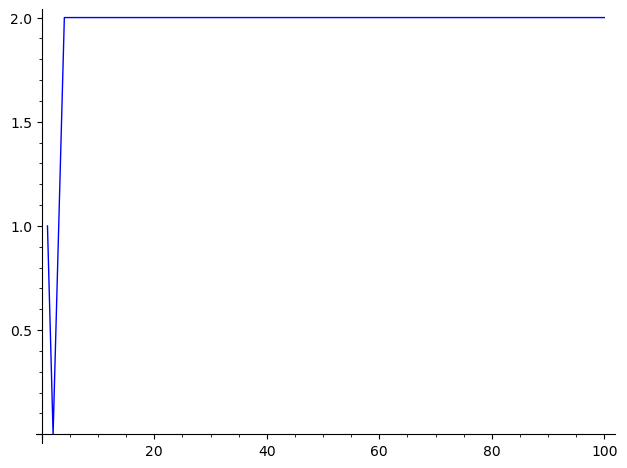

LOGS MINIMUM MODULI


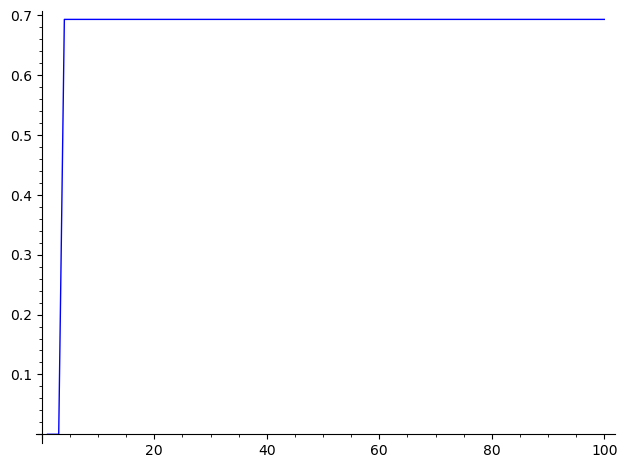

In [6]:
import pickle
from sage.all import sigma, nth_prime
import ast


with open('/Users/barrybrent/data2/run23feb26no3.txt', 'rb') as rfile:
    j_list = pickle.load(rfile)
    
def P_matrix(lst):
    lenlist=len(lst)
    columns=[lst]
    for k in range(1,lenlist):
        column=[0]*(k-1)
        column=column+[-k]
        column=flatten(column+[lst])
        column=column+[lst]
        column=column[:lenlist]
        columns+=[column]
    return (matrix(columns)).transpose()

from sage.all import *
precision_bits = 100
CC = ComplexField(precision_bits)
x = polygen(QQ)  # Can remain in preamble if all polynomials are in one variable

charpol_list=[]
roots_list=[]

mins_list=[]
log_mins_list=[]

dets=[]

for n in range(1, 101):
    print(n)
    deformed_j_list=j_list[:n]
    inputs=[pair[1] for pair in deformed_j_list]
    pl=P_matrix(inputs) 
    det=pl.det()
    dets.append((n,det))
    cp=pl.charpoly()
    charpol_list.append((n,cp))
    roots = cp.roots(ring=CC, multiplicities=False)       
    roots_list.append((n,roots))
    aar = [r.abs() for r in roots]
    if aar!=[]:
        minn = min(aar)  
        mins_list.append((n,minn))
        if minn>0:
            log_minn=log(minn)
            log_mins_list.append((n,log_minn))
        


p = list_plot(mins_list, plotjoined=True, axes_labels=['', ''])
print("MINIMUM MODULI")
p.show()

p = list_plot(log_mins_list, plotjoined=True, axes_labels=['', ''])
print("LOGS MINIMUM MODULI")
p.show()


with open('/Users/barrybrent/data2/run23feb26no4.txt', 'wb') as wfile:
    pickle.dump(mins_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run23feb26no5.txt', 'wb') as wfile:
    pickle.dump(roots_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run23feb26no6.txt', 'wb') as wfile:
    pickle.dump(charpol_list, wfile) #output snipped

with open('/Users/barrybrent/data2/run23feb26no7.txt', 'wb') as wfile:
    pickle.dump(dets, wfile) #output snipped
    
with open('/Users/barrybrent/data2/run23feb26no8.txt', 'wb') as wfile:
    pickle.dump(log_mins_list, wfile) #output snipped


